In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from hmmlearn import hmm
import FinanceDataReader as fdr
warnings.simplefilter('ignore')

## Model Selection (Decide the number of Hidden States by BIC)

State : 2
State : 3
State : 4
State : 5
State : 6
State : 7
State : 8
State : 9


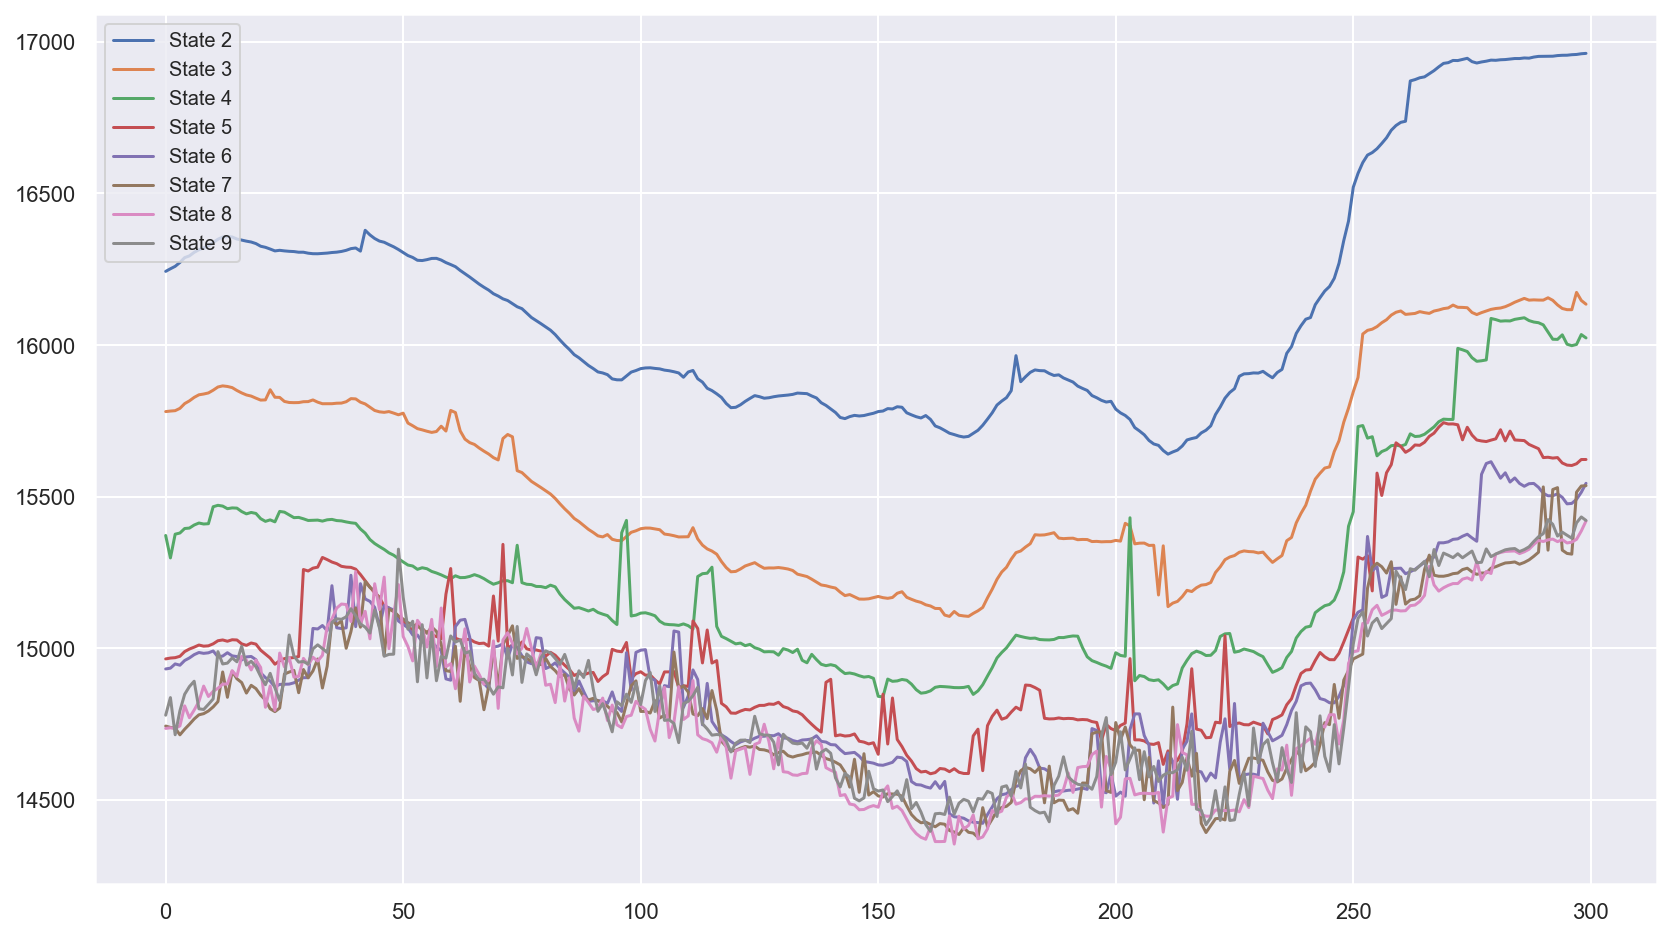

In [36]:
# 코스피지수
df = fdr.DataReader('KS11', start='2007-01-01')

# OHLC 다 쓰자
dataset = np.array(df)

# BIC / (AIC)로 모델 Selection
n_iter = 1000
block_size = 200  # 한번에 200영업일
plt.figure(figsize=(14, 8))

for number_of_states in range(2, 10):
    BIC = []
    start = 0
    end = block_size

    # 첫 블록
    Ob = dataset[start:end, :]
    model = hmm.GaussianHMM(
        n_components=number_of_states, tol=0.001, n_iter=n_iter)
    model.fit(Ob)

    L = model.score(Ob)  # 로그가능도
    # 논문대로...
    k = number_of_states ** 2 + number_of_states*2 - 1
    M = Ob.shape[0] * Ob.shape[1]  # 데이터갯수
    BIC.append(-2*L + k*np.log(M))

    initial_prob = model.startprob_
    transition_prob = model.transmat_

    # emission prob이, Ob이 가우시안분포 따르므로,
    # 행렬이 아닌 분포의 정보로 표시해줘야 함

    # Z1의 분포, Z2의 분포가 다 다르고, Emission prob은 Z에만 의존함
    emission_mu = model.means_
    emission_cov = model.covars_

    if model.monitor_.iter == n_iter:
        print(f'수렴 실패. 반복 횟수(n_iter ={n_iter})를 더 늘려봅시다.')

    # from second block
    for _ in range(299):  # 앞에서 1번했으니 299번 더 하기
        start += 1  # index값을 1칸씩 Slide
        end += 1

        Ob = dataset[start:end, :]
        model = hmm.GaussianHMM(
            n_components=number_of_states, tol=0.001, n_iter=n_iter)
        model.fit(Ob)

        L = model.score(Ob)  # 로그가능도
        # 논문대로...
        k = number_of_states ** 2 + number_of_states*2 - 1
        M = Ob.shape[0] * Ob.shape[1]  # 데이터갯수
        BIC.append(-2*L + k*np.log(M))

        initial_prob = model.startprob_
        transition_prob = model.transmat_

        # emission prob이, Ob이 가우시안분포 따르므로,
        # 행렬이 아닌 분포의 정보로 표시해줘야 함

        # Z1의 분포, Z2의 분포가 다 다르고, Emission prob은 Z에만 의존함
        emission_mu = model.means_
        emission_cov = model.covars_

        if model.monitor_.iter == n_iter:
            print(f'수렴 실패. 반복 횟수(n_iter ={n_iter})를 더 늘려봅시다.')

    print(f"State : {number_of_states}")
    plt.plot(BIC, label='State ' + str(number_of_states))

plt.legend(loc='upper left', fontsize=10)
plt.show()

## Stock Price Prediction

In [15]:
df = fdr.DataReader('KS11', start='2007-01-01')
dataset = np.array(df)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'



 **정확도 = 66.0 %


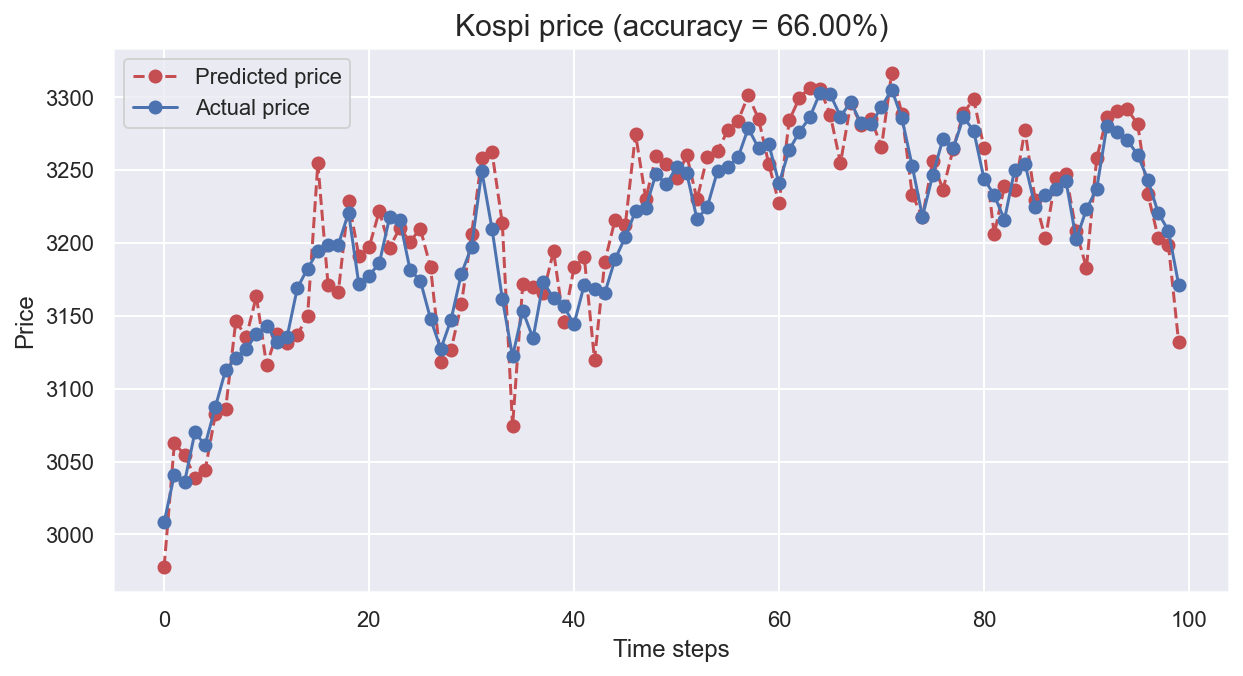

In [52]:
num_test = 100  # 예측할 주식가격 갯수 (테스트 사이즈)
stepsize = 1   # 과거로 시퀀스 돌아갈 때 건너뛸 스텝
blocksize = 40  # 2개월의 영업일
num_iter = 10000
num_state = 6  # 위 결과대로

pred_stock = []
num_data = len(dataset)
traceJ = []
for i in range(num_data - num_test, num_data):
    trainset = dataset[:i, :]
    testset = dataset[i, :]  # test data point

    if i == (num_data - num_test):
        model = hmm.GaussianHMM(n_components=num_state,
                                tol=0.001, n_iter=num_iter)
    else:
        model.transmat_ = transition_prob
        model.startprob_ = initial_prob
        model.means_ = mu
        model.covars_ = np.array([np.diag(i) for i in cov])

    model.fit(trainset)
    transition_prob = model.transmat_
    initial_prob = model.startprob_
    mu = model.means_
    cov = model.covars_

    end = i
    start = end - blocksize
    current_likelihood = model.score(trainset[start:end, :])

    past_likelihood = []
    past_end = []
    num_past = 40   # 과거 두달만 살펴봄
    while True:
        end -= stepsize
        start = end - blocksize
        if (start < 0) or (num_past <= 0):
            break
        past_likelihood.append(model.score(trainset[start:end, :]))
        past_end.append(end-1)  # 마지막 종가 위치 기록용
        num_past -= 1

    # 제일 낮은 지점이 j번째 블럭임
    j = np.argmin(np.absolute(past_likelihood - current_likelihood))
    traceJ.append(j)

    # 주가예측
    j_position = past_end[j]  # j번째 블럭의 마지막날 종가위치
    rt = (trainset[j_position+1, 0] -
          trainset[j_position, 0]) / trainset[j_position, 3]
    pred_stock.append(dataset[i, 0] * (1+rt))


real_stock = dataset[num_data-num_test:, 0]
pred_stock = np.array(pred_stock)

# 실제 및 예측의 diff 및 정확도 계산
real_diff = np.diff(real_stock) > 0
pred_diff = np.diff(pred_stock) > 0
accuracy = 100 * (real_diff.astype(int) == pred_diff.astype(int)).sum() / num_test
print("\n **정확도 = {} %".format(accuracy))


plt.figure(figsize=(10, 5))
plt.plot(range(num_test), pred_stock,'r--o', label = 'Predicted price');
plt.plot(range(num_test), real_stock,'b-o', label = 'Actual price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('Kospi price (accuracy = ' + str.format("%.2f" % accuracy) +'%)', fontsize=15)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()